## Libraries

In [1]:
# Determinadas.
import numpy as np
import pandas
import matplotlib.pyplot as plt
import random

# Preprocesamientos.
from sklearn import preprocessing

# Modelos.
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.manifold import MDS
from sklearn.decomposition import PCA

# Procesamiento de imágenes.
import numpy as np
import cv2
import os
from numpy import mean
from numpy import std

# Control de modelos.
from joblib import dump, load

## Import models

In [2]:
lettersModel = load('Models/SVC Models/Complex_Letters_SVC_Model.joblib') 
numbersModel = load('Models/SVC Models/Complex_Numbers_SVC_Model.joblib') 

## Car plate experiment

In [3]:
path = r'Experiments datasets\Only car plates images dataset\796ZBC.jpg'
# path = r'Datasets\Plate_examples\1.jpg'
carImgExperiment = cv2.imread(path)

height, width, channels = carImgExperiment.shape

# carImgExperiment = cv2.cvtColor(carImgExperiment, cv2.COLOR_BGR2RGB)

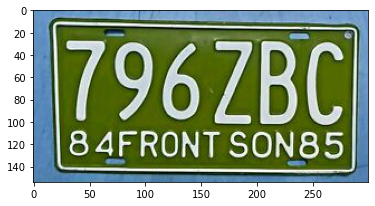

In [4]:
plt.figure()
plt.imshow(carImgExperiment)
# plt.imshow(imgExperiment, cmap='gray')
plt.show()

In [5]:
# Convertir a escala de grises.
grayImg = cv2.cvtColor(carImgExperiment, cv2.COLOR_BGR2GRAY)

# Blur
blur = cv2.GaussianBlur(grayImg,(3,3),0)

# # Aplicar umbral binario inverso.
# binary = cv2.threshold(blur, 140, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
binary = cv2.threshold(blur, 140, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

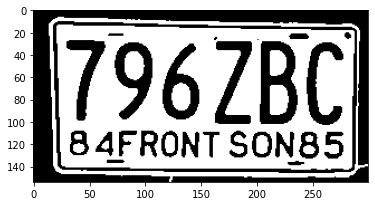

In [6]:
plt.figure()
plt.imshow(binary, cmap='gray')
# plt.imshow(imgExperiment, cmap='gray')
plt.show()

In [7]:
countours, hierarchy = cv2.findContours(binary.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# contours, hierarchy = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rectangles = [cv2.boundingRect(countour) for countour in countours]
# cv2.drawContours(carImgExperiment, contours, -1, (0, 255, 0), 6)

# print(rectangles)

# for i in contours:
#     print(len(i))
print(len(rectangles))

40


In [8]:
imgns = []
newRectangles = []
for rect in rectangles:
    if (rect[2] >= (width * 0.02) and rect[2] <= (width * 0.3))  and  (rect[3] >= (height * 0.3) and rect[3] <= (height * 0.8)):
        imgn = carImgExperiment[rect[1]:rect[1] + rect[3], rect[0]:rect[0] + rect[2]]
        imgn = cv2.resize(imgn, (28, 28))
        cv2.rectangle(carImgExperiment, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (255, 0, 0), 2)
        imgns.append(imgn)
        newRectangles.append(rect)

newRectangles = np.asarray(newRectangles)

In [9]:
interestPoint = []

for i in range(len(newRectangles)):
    interestPoint.append( [newRectangles[i,1], newRectangles[i,1]+newRectangles[i,3], newRectangles[i,3]] )

interestPoint = preprocessing.normalize(interestPoint)
    
print(interestPoint)

[[0.23261866 0.79411197 0.56149331]
 [0.212414   0.78896627 0.57655227]
 [0.22399283 0.79197466 0.56798182]
 [0.20638969 0.78733845 0.58094876]
 [0.20638969 0.78733845 0.58094876]
 [0.2045786  0.78684076 0.58226216]]


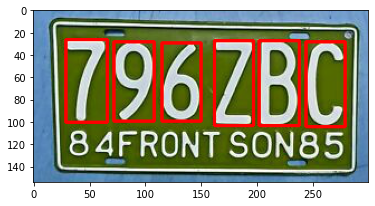

In [10]:
plt.figure()
plt.imshow(carImgExperiment)
# plt.imshow(imgExperiment, cmap='gray')
plt.show()

In [11]:
print(len(imgns))

6


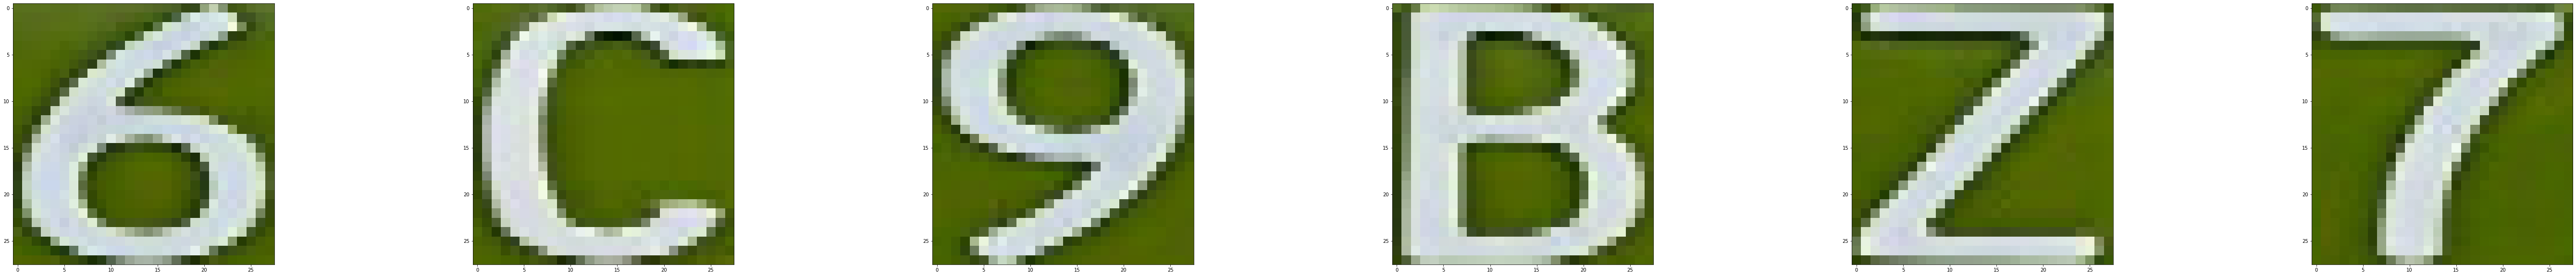

In [12]:
plt.figure(figsize=(100,10))
for i in range(len(imgns)):
    plt.subplot(1,len(imgns),i+1)
    plt.imshow(imgns[i])
    
plt.show()

# plt.figure()
# plt.imshow(imgns[5])
# # plt.imshow(imgExperiment, cmap='gray')
# plt.show()

In [13]:
for rect in newRectangles:
    print(rect)

[115  29  35  70]
[244  28  35  76]
[72 28 36 71]
[202  27  36  76]
[162  27  35  76]
[29 26 37 74]


In [14]:
interestPointDF = pandas.DataFrame(interestPoint)
print( type(interestPointDF.values) )

<class 'numpy.ndarray'>


## Linkage part

In [15]:
Z = linkage(interestPointDF.values, 'ward')
Z

array([[3.00000000e+00, 4.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [5.00000000e+00, 6.00000000e+00, 2.64645214e-03, 3.00000000e+00],
       [1.00000000e+00, 7.00000000e+00, 1.02848063e-02, 4.00000000e+00],
       [0.00000000e+00, 2.00000000e+00, 1.10033527e-02, 2.00000000e+00],
       [8.00000000e+00, 9.00000000e+00, 4.32993502e-02, 6.00000000e+00]])

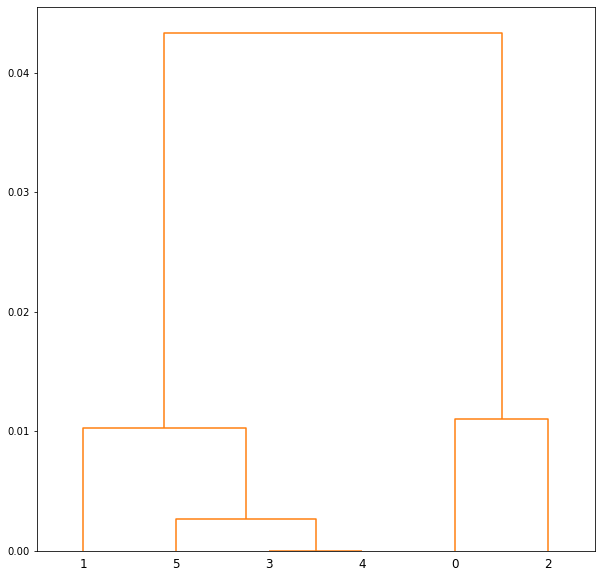

In [16]:
# Graficar dendograma
plt.figure(figsize=(10,10))
dn = dendrogram(Z, color_threshold=22)
plt.show()

In [17]:
g = fcluster(Z,criterion='distance',t=0.12)

In [18]:
groups = np.unique(g)
maxRepeatedGroup = -100
biggestGroup = 0

for group in groups:
    if( len(interestPointDF[g == group]) > maxRepeatedGroup):
        maxRepeatedGroup = len(interestPointDF[g == group])
        biggestGroup = group
        
print(biggestGroup)

1


In [19]:
imgns = np.asarray(imgns)

In [20]:
correctIndexes = g == biggestGroup
print(correctIndexes)

[ True  True  True  True  True  True]


In [21]:
correctImgns = imgns[correctIndexes]
correctRectangles = newRectangles[correctIndexes]
print(len(correctImgns))
print(len(correctRectangles))

6
6


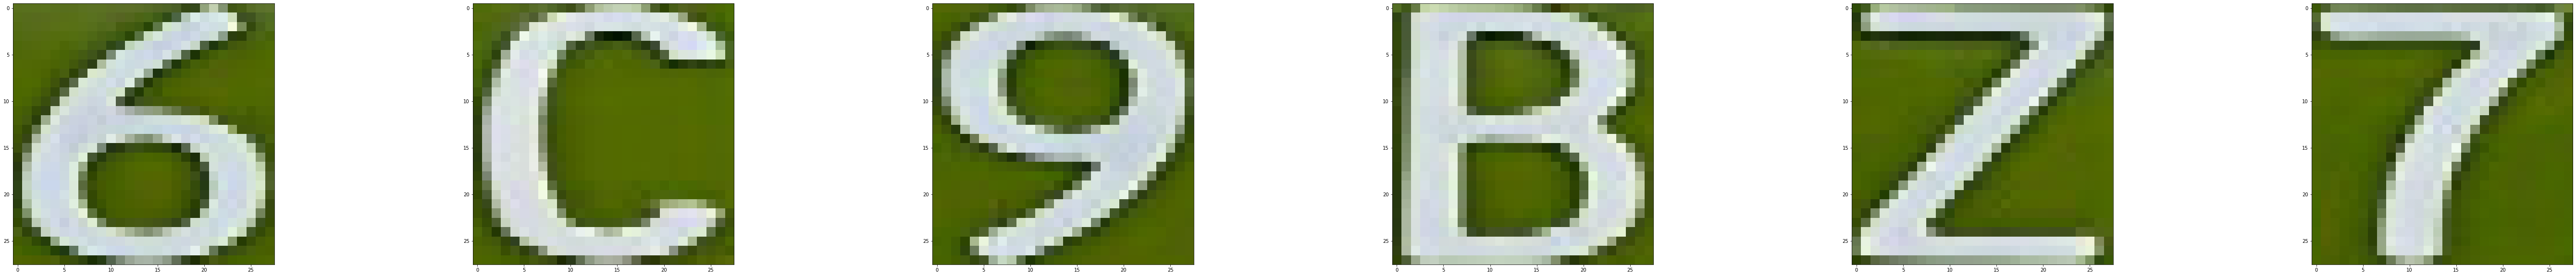

In [22]:
plt.figure(figsize=(100,10))
for i in range(len(correctImgns)):
    plt.subplot(1,len(correctImgns),i+1)
    plt.imshow(correctImgns[i])
    
plt.show()

## Sort

In [23]:
correctRectangles[:,0]

array([115, 244,  72, 202, 162,  29])

In [24]:
sorted_imgns = correctImgns[correctRectangles[:, 0].argsort()]
print(correctRectangles[:, 0].argsort())

[5 2 0 4 3 1]


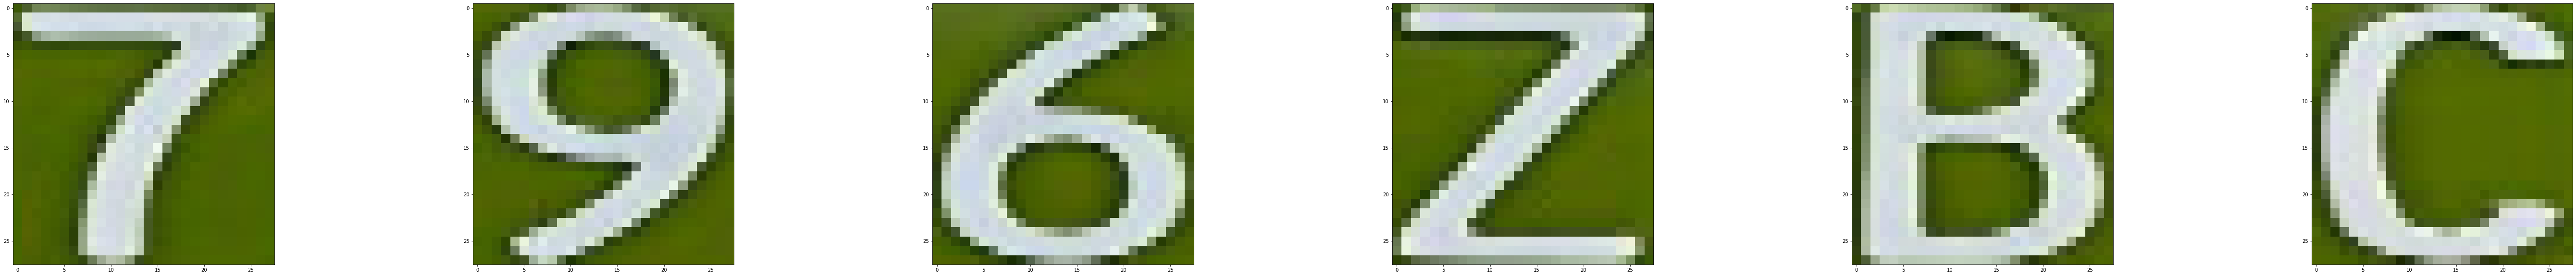

In [25]:
plt.figure(figsize=(100,10))
for i in range(len(sorted_imgns)):
    plt.subplot(1,len(sorted_imgns),i+1)
    plt.imshow(sorted_imgns[i])
    
plt.show()

### Letters conversation

In [26]:
# convert to grayscale and blur the image (20)
gray2 = cv2.cvtColor(sorted_imgns[1], cv2.COLOR_BGR2GRAY)

blur2 = cv2.GaussianBlur(gray2,(7,7),0)

# Aplicar umbral binario inverso.
binary2 = cv2.threshold(blur2, 180, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
# binary2 = cv2.threshold(blur2, 180, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

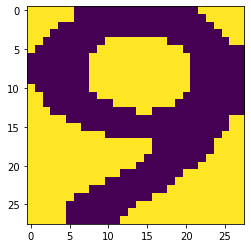

In [27]:
plt.figure()
plt.imshow(binary2)
# plt.imshow(imgExperiment, cmap='gray')
plt.show()

In [28]:
# Enflacar
imgFlat = binary2.flatten()

# Redimensionar
h = imgFlat.reshape(1,-1)

In [29]:
Ypred = lettersModel.predict_proba(h)
print( -np.sort(-Ypred, axis=1)[0,0] )

Ypred = lettersModel.predict(h)
print(chr(Ypred[0]))



0.1860824605369592
W


In [30]:
Ypred = numbersModel.predict_proba(h)
print( np.sort(Ypred, axis=1) )

Ypred = numbersModel.predict(h)
print(Ypred)

[[0.00610668 0.01456369 0.02845928 0.03229484 0.0380766  0.04148044
  0.05943429 0.09951678 0.13466324 0.54540415]]
[6]
